In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sys
sys.path.append('.')

## 1. Carregar Dados Processados

In [8]:
# Carregar dados processados (já padronizados)
XTrain = pd.read_csv('dados_processados/XTrain.csv')
XTest = pd.read_csv('dados_processados/XTest.csv')
YTrain = pd.read_csv('dados_processados/YTrain.csv').values.flatten()  # Flatten para 1D
YTest = pd.read_csv('dados_processados/YTest.csv').values.flatten()    # Flatten para 1D

# Converter para numpy arrays
X_train = XTrain.values
X_test = XTest.values

# Reshape Y para formato coluna (n, 1) para compatibilidade com rede neural
YTrain = YTrain.reshape(-1, 1)
YTest = YTest.reshape(-1, 1)

print(f"✅ Dados carregados com sucesso!")
print(f"\n📊 Dimensões:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   Y_train: {YTrain.shape}")
print(f"   Y_test: {YTest.shape}")
print(f"\n📝 Features ({X_train.shape[1]}):")
print(f"   {list(XTrain.columns)}")

✅ Dados carregados com sucesso!

📊 Dimensões:
   X_train: (295431, 35)
   X_test: (73858, 35)
   Y_train: (295431, 1)
   Y_test: (73858, 1)

📝 Features (35):
   ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'SD1', 'SD2', 'sampen', 'higuci', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'condition_no stress', 'condition_time pressure']


## 2. Importar a Rede Neural

In [9]:
import os

# Verificar se o arquivo existe
arquivo_path = 'neural_network.py'
if os.path.exists(arquivo_path):
    print(f"✅ Arquivo '{arquivo_path}' encontrado")
    print(f"   Caminho absoluto: {os.path.abspath(arquivo_path)}")
    print(f"   Tamanho: {os.path.getsize(arquivo_path)} bytes")
else:
    print(f"❌ Arquivo '{arquivo_path}' NÃO encontrado")
    print(f"   Diretório atual: {os.getcwd()}")
    print(f"   Arquivos disponíveis: {os.listdir('.')}")

✅ Arquivo 'neural_network.py' encontrado
   Caminho absoluto: /home/kauar/ica-homeworks/neural_network.py
   Tamanho: 7499 bytes


In [10]:
# Limpar cache do Python e importar
import importlib
import sys

# Remover do cache se já foi importado
if 'neural_network' in sys.modules:
    del sys.modules['neural_network']

# Importar a classe
from neural_network import NeuralNetworkRegression

print("✅ Classe NeuralNetworkRegression importada com sucesso!")
print(f"   Classe: {NeuralNetworkRegression}")
print(f"   Módulo: {NeuralNetworkRegression.__module__}")

✅ Classe NeuralNetworkRegression importada com sucesso!
   Classe: <class 'neural_network.NeuralNetworkRegression'>
   Módulo: neural_network


## 3. Criar e Configurar o Modelo

In [11]:
# Parâmetros do modelo
input_size = X_train.shape[1]      # Número de features
hidden_size = 64                   # Neurônios na camada oculta
output_size = 1                    # Regressão (1 saída)
weight_decay = 0.001               # Regularização L2
learning_rate = 0.01               # Taxa de aprendizado
epochs = 2000                      # Número de épocas

# Criar modelo
model = NeuralNetworkRegression(
    input_size=input_size,
    hidden_size=hidden_size,
    output_size=output_size,
    weight_decay=weight_decay
)

print(f"✅ Modelo criado com sucesso!")
print(f"\n🏗️ Arquitetura:")
print(f"   Camada de entrada: {input_size} neurônios")
print(f"   Camada oculta: {hidden_size} neurônios (Sigmoide)")
print(f"   Camada de saída: {output_size} neurônio (Linear)")
print(f"   Regularização L2: {weight_decay}")

✅ Modelo criado com sucesso!

🏗️ Arquitetura:
   Camada de entrada: 35 neurônios
   Camada oculta: 64 neurônios (Sigmoide)
   Camada de saída: 1 neurônio (Linear)
   Regularização L2: 0.001


## 4. Treinar o Modelo

In [12]:
print(f"🚀 Iniciando treinamento...\n")

loss_history = model.train(
    X_train, 
    YTrain, 
    epochs=epochs, 
    learning_rate=learning_rate
)

print(f"\n✅ Treinamento concluído!")

🚀 Iniciando treinamento...

Epoch 0, Loss (MSE): 5274.9276
Epoch 0, Loss (MSE): 5274.9276
Epoch 1000, Loss (MSE): 1.1646
Epoch 1000, Loss (MSE): 1.1646

✅ Treinamento concluído!

✅ Treinamento concluído!


## 5. Visualizar Evolução da Perda (Loss)

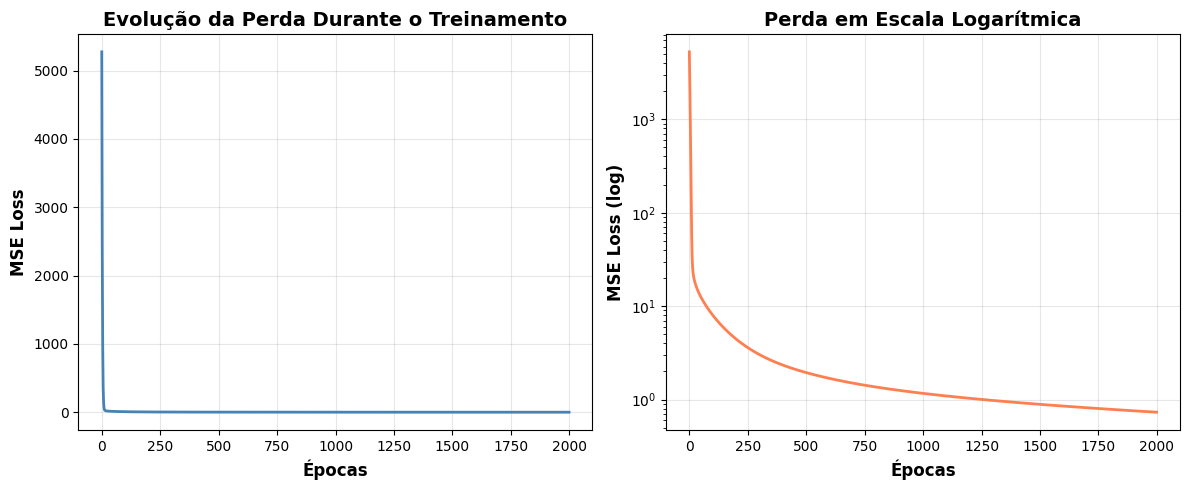

Loss inicial: 5274.9276
Loss final: 0.7324
Melhoria: 99.99%


In [13]:
plt.figure(figsize=(12, 5))

# Gráfico 1: Loss ao longo das épocas
plt.subplot(1, 2, 1)
plt.plot(loss_history, linewidth=2, color='steelblue')
plt.xlabel('Épocas', fontsize=12, fontweight='bold')
plt.ylabel('MSE Loss', fontsize=12, fontweight='bold')
plt.title('Evolução da Perda Durante o Treinamento', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Gráfico 2: Loss em escala logarítmica
plt.subplot(1, 2, 2)
plt.semilogy(loss_history, linewidth=2, color='coral')
plt.xlabel('Épocas', fontsize=12, fontweight='bold')
plt.ylabel('MSE Loss (log)', fontsize=12, fontweight='bold')
plt.title('Perda em Escala Logarítmica', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_loss.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Loss inicial: {loss_history[0]:.4f}")
print(f"Loss final: {loss_history[-1]:.4f}")
print(f"Melhoria: {(loss_history[0] - loss_history[-1]) / loss_history[0] * 100:.2f}%")

## 6. Avaliação do Modelo

In [20]:
# Predições
y_train_pred = model.forward(X_train)
y_test_pred = model.forward(X_test)

# Métricas de avaliação: R² e RMSE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# R² Score
train_r2 = r2_score(YTrain, y_train_pred)
test_r2 = r2_score(YTest, y_test_pred)

# RMSE (Root Mean Squared Error)
train_mse = mean_squared_error(YTrain, y_train_pred)
test_mse = mean_squared_error(YTest, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("📊 MÉTRICAS DE AVALIAÇÃO")
print("="*60)
print(f"\n{'Métrica':<20} {'Treino':<20} {'Teste':<20}")
print("-"*60)
print(f"{'R² Score':<20} {train_r2:<20.6f} {test_r2:<20.6f}")
print(f"{'RMSE':<20} {train_rmse:<20.6f} {test_rmse:<20.6f}")
print("="*60)

# Interpretação
print(f"   R² Treino: {train_r2:.4f} - {'Excelente' if train_r2 > 0.9 else 'Muito Bom' if train_r2 > 0.8 else 'Bom' if train_r2 > 0.7 else 'Aceitável' if train_r2 > 0.5 else 'Fraco'}")
print(f"   R² Teste:  {test_r2:.4f} - {'Excelente' if test_r2 > 0.9 else 'Muito Bom' if test_r2 > 0.8 else 'Bom' if test_r2 > 0.7 else 'Aceitável' if test_r2 > 0.5 else 'Fraco'}")
print(f"\n   RMSE Treino: {train_rmse:.6f} bpm")
print(f"   RMSE Teste:  {test_rmse:.6f} bpm")
print(f"\n   Diferença R² (Treino - Teste): {abs(train_r2 - test_r2):.6f}")

📊 MÉTRICAS DE AVALIAÇÃO

Métrica              Treino               Teste               
------------------------------------------------------------
R² Score             0.993149             0.993119            
RMSE                 0.855671             0.857396            
   R² Treino: 0.9931 - Excelente
   R² Teste:  0.9931 - Excelente

   RMSE Treino: 0.855671 bpm
   RMSE Teste:  0.857396 bpm

   Diferença R² (Treino - Teste): 0.000030


## 7. Visualizar Predições vs Valores Reais

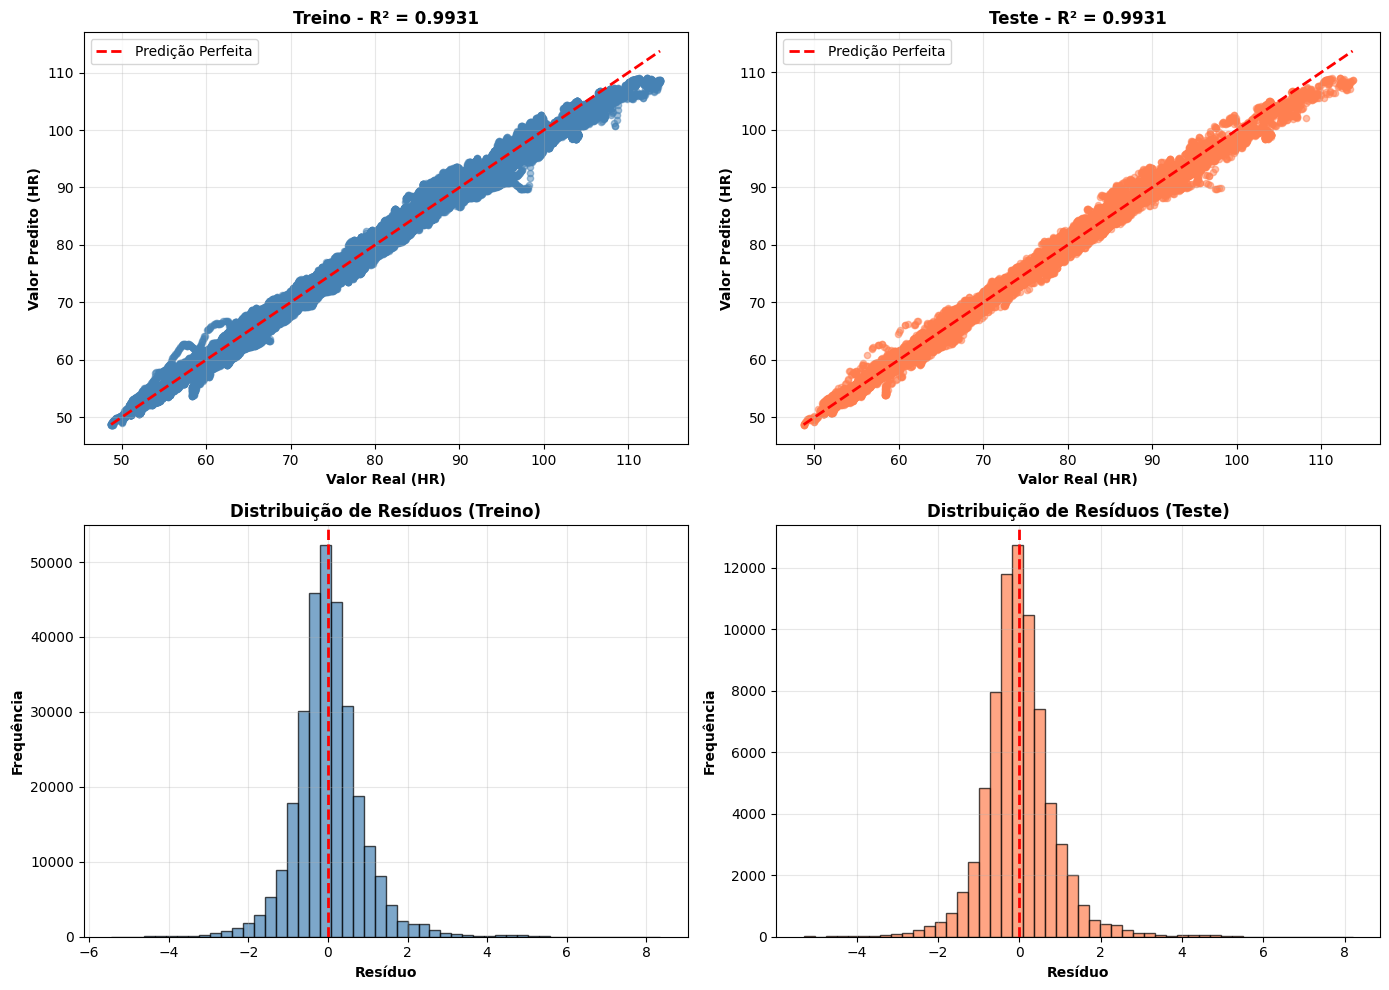

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Predições vs Reais (Treino)
axes[0, 0].scatter(YTrain, y_train_pred, alpha=0.5, s=20, color='steelblue')
axes[0, 0].plot([YTrain.min(), YTrain.max()], [YTrain.min(), YTrain.max()], 
                 'r--', lw=2, label='Predição Perfeita')
axes[0, 0].set_xlabel('Valor Real (HR)', fontweight='bold')
axes[0, 0].set_ylabel('Valor Predito (HR)', fontweight='bold')
axes[0, 0].set_title(f'Treino - R² = {train_r2:.4f}, RMSE = {train_rmse:.4f}', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Predições vs Reais (Teste)
axes[0, 1].scatter(YTest, y_test_pred, alpha=0.5, s=20, color='coral')
axes[0, 1].plot([YTest.min(), YTest.max()], [YTest.min(), YTest.max()], 
                 'r--', lw=2, label='Predição Perfeita')
axes[0, 1].set_xlabel('Valor Real (HR)', fontweight='bold')
axes[0, 1].set_ylabel('Valor Predito (HR)', fontweight='bold')
axes[0, 1].set_title(f'Teste - R² = {test_r2:.4f}, RMSE = {test_rmse:.4f}', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Distribuição de Resíduos (Treino)
residuos_train = YTrain - y_train_pred
axes[1, 0].hist(residuos_train, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(0, color='r', linestyle='--', linewidth=2)
axes[1, 0].axvline(residuos_train.mean(), color='g', linestyle='-', linewidth=2, label=f'Média = {residuos_train.mean():.4f}')
axes[1, 0].set_xlabel('Resíduo (bpm)', fontweight='bold')
axes[1, 0].set_ylabel('Frequência', fontweight='bold')
axes[1, 0].set_title('Distribuição de Resíduos (Treino)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Distribuição de Resíduos (Teste)
residuos_test = YTest - y_test_pred
axes[1, 1].hist(residuos_test, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(0, color='r', linestyle='--', linewidth=2)
axes[1, 1].axvline(residuos_test.mean(), color='g', linestyle='-', linewidth=2, label=f'Média = {residuos_test.mean():.4f}')
axes[1, 1].set_xlabel('Resíduo (bpm)', fontweight='bold')
axes[1, 1].set_ylabel('Frequência', fontweight='bold')
axes[1, 1].set_title('Distribuição de Resíduos (Teste)', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico salvo: model_evaluation.png")

## 8. Análise de Exemplos

In [ ]:
print("🎯 EXEMPLOS DE PREDIÇÕES (Conjunto de Teste)\n")
print(f"{'Índice':<10} {'Real':<12} {'Predito':<12} {'Erro Abs':<12} {'% Erro':<12}")
print("-"*58)

# Mostrar 10 exemplos aleatórios do conjunto de teste
indices = np.random.choice(len(YTest), 10, replace=False)
erros_percentuais = []

for idx in indices:
    real = YTest[idx][0]
    pred = y_test_pred[idx][0]
    erro_abs = abs(real - pred)
    erro_perc = (erro_abs / abs(real)) * 100 if real != 0 else 0
    erros_percentuais.append(erro_perc)
    print(f"{idx:<10} {real:<12.4f} {pred:<12.4f} {erro_abs:<12.4f} {erro_perc:<12.2f}%")

print("-"*58)
print(f"\n📊 ESTATÍSTICAS DOS ERROS:")
print(f"   Erro Absoluto Médio: {np.mean(np.abs(residuos_test)):.6f} bpm")
print(f"   Erro Percentual Médio: {np.mean(erros_percentuais):.2f}%")
print(f"   Mediana do Erro Percentual: {np.median(erros_percentuais):.2f}%")

🎯 EXEMPLOS DE PREDIÇÕES

Índice     Real         Predito      Erro        
----------------------------------------------
4473       76.1714      76.2584      0.0870      
53188      75.7402      75.8628      0.1226      
22993      65.0616      65.1642      0.1025      
33296      53.9832      53.1018      0.8813      
54795      72.3208      73.5035      1.1827      
32281      78.1555      77.2717      0.8838      
62411      75.3994      74.5324      0.8670      
18969      69.3328      69.4279      0.0952      
2175       71.5491      71.8195      0.2705      
18178      75.5182      75.8903      0.3721      


## 9. Salvar o Modelo Treinado

In [17]:
# Salvar o modelo treinado
import os

# Criar diretório para modelos
modelos_dir = 'modelos_treinados'
if not os.path.exists(modelos_dir):
    os.makedirs(modelos_dir)
    print(f"✅ Diretório '{modelos_dir}' criado")

# Salvar o modelo
modelo_path = f'{modelos_dir}/modelo_hr_prediction.npz'
model.save_model(modelo_path)

# Obter informações do modelo
info = model.get_model_info()

print("\n📊 INFORMAÇÕES DO MODELO SALVO")
print("="*50)
print(f"{'Parâmetro':<25} {'Valor':<25}")
print("-"*50)
print(f"{'Camada de entrada':<25} {info['input_size']:<25}")
print(f"{'Camada oculta':<25} {info['hidden_size']:<25}")
print(f"{'Camada de saída':<25} {info['output_size']:<25}")
print(f"{'Weight Decay (L2)':<25} {info['weight_decay']:<25}")
print(f"{'Total de parâmetros':<25} {info['total_params']:<25}")
print("="*50)
print(f"\n📁 Arquivo salvo em: {modelo_path}")
print(f"   Tamanho: {os.path.getsize(modelo_path) / 1024:.2f} KB")

✅ Diretório 'modelos_treinados' criado
✅ Modelo salvo com sucesso em: modelos_treinados/modelo_hr_prediction.npz
   Tamanho do arquivo: Save several arrays into a single file in uncompressed ``.npz`` format.

    Provide arrays as keyword arguments to store them under the
    corresponding name in the output file: ``savez(fn, x=x, y=y)``.

    If arrays are specified as positional arguments, i.e., ``savez(fn,
    x, y)``, their names will be `arr_0`, `arr_1`, etc.

    Parameters
    ----------
    file : file, str, or pathlib.Path
        Either the filename (string) or an open file (file-like object)
        where the data will be saved. If file is a string or a Path, the
        ``.npz`` extension will be appended to the filename if it is not
        already there.
    args : Arguments, optional
        Arrays to save to the file. Please use keyword arguments (see
        `kwds` below) to assign names to arrays.  Arrays specified as
        args will be named "arr_0", "arr_1", and s

In [18]:
# Teste: Carregar o modelo salvo e fazer predições
print("🧪 TESTE DE CARREGAMENTO DO MODELO\n")

# Carregar o modelo salvo
modelo_carregado = NeuralNetworkRegression.load_model(modelo_path)

# Obter informações
info_carregado = modelo_carregado.get_model_info()

print("\n📊 Comparação: Modelo Original vs Carregado")
print("="*50)
info_original = model.get_model_info()

for key in info_original.keys():
    original = info_original[key]
    carregado = info_carregado[key]
    match = "✅" if original == carregado else "❌"
    print(f"{match} {key:<25}: {original} → {carregado}")

print("="*50)

# Fazer predições com o modelo carregado
y_test_pred_carregado = modelo_carregado.forward(X_test)

# Comparar com predições do modelo original
diff = np.abs(y_test_pred - y_test_pred_carregado).max()
print(f"\n✅ Máxima diferença nas predições: {diff:.2e}")
print(f"   (Deve estar próximo de 0 - confirma que o modelo foi carregado corretamente)")

# Exemplo de predição com o modelo carregado
print(f"\n🎯 Exemplo de Predição (usando modelo carregado):")
idx_exemplo = 0
print(f"   Real: {YTest[idx_exemplo][0]:.4f}")
print(f"   Predito (original): {y_test_pred[idx_exemplo][0]:.4f}")
print(f"   Predito (carregado): {y_test_pred_carregado[idx_exemplo][0]:.4f}")

🧪 TESTE DE CARREGAMENTO DO MODELO

✅ Modelo carregado com sucesso de: modelos_treinados/modelo_hr_prediction.npz
   Arquitetura: 35 → 64 → 1
   Weight Decay: 0.001

📊 Comparação: Modelo Original vs Carregado
✅ input_size               : 35 → 35
✅ hidden_size              : 64 → 64
✅ output_size              : 1 → 1
✅ weight_decay             : 0.001 → 0.001
✅ total_params             : 2369 → 2369

✅ Máxima diferença nas predições: 0.00e+00
   (Deve estar próximo de 0 - confirma que o modelo foi carregado corretamente)

🎯 Exemplo de Predição (usando modelo carregado):
   Real: 86.3149
   Predito (original): 84.9860
   Predito (carregado): 84.9860


## 10. Carregar e Usar o Modelo Salvo

### Como carregar o modelo em outro notebook

```python
from neural_network import NeuralNetworkRegression

# Carregar o modelo
modelo_carregado = NeuralNetworkRegression.load_model('modelos_treinados/modelo_hr_prediction.npz')

# Fazer predições com novos dados
X_novo = ...  # seus dados processados
predicoes = modelo_carregado.forward(X_novo)

# Obter informações do modelo
info = modelo_carregado.get_model_info()
print(f"Arquitetura: {info['input_size']} → {info['hidden_size']} → {info['output_size']}")
```